# **Graduate Rotational Internship Program (GRIP)**
## **The Sparks Foundation (TSF)**

### **Task 1 - Prediction using Supervised ML**
In this exercise, we are going to predict the mark of a student based on the number of study hours. This is a simple linear regression task as it involes just 2 variables.

The exercise is performed in the following steps:
1. Import required libraries
2. Load dataset
3. Data exploration
4. Data visualization
5. Data preparation
6. Train the algorithm
7. Linear regression formula
8. Model evaluation
9. An example ***(bonus)***

#### **Import required libraries**

In [1]:
# Import all required libraries and frameworks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Make graphs embedded in the notebook, instead of an external window
# Change to '%matplotlib notebook' to see the difference
%matplotlib inline

#### **Load dataset**

In [2]:
# Load dataset
origin_data = pd.read_csv('data.csv')
print("Data is imported successfully.")

# Display 5 random data samples
origin_data.sample(5)

Data is imported successfully.


,Hours,Scores
19,7.4,69
17,1.9,24
2,3.2,27
16,2.5,30
6,9.2,88


#### **Data Exploration**

In [3]:
# A summary of statistics pertaining to the data columns
origin_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
# A concise summary of the data
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### **Data visualization**

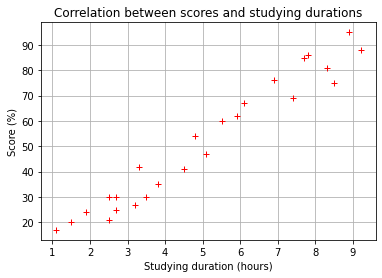

In [5]:
origin_data.plot(x='Hours', y='Scores', style='+', color='red', legend=None)  
plt.title('Correlation between scores and studying durations')
plt.xlabel('Studying duration (hours)')
plt.ylabel('Score (%)')
plt.grid(True)

#### **Data preparation**

Divide the data into "attributes" (inputs) and "labels" (outputs).

In [6]:
# :1 or :-1 ??
X = origin_data.iloc[:, :1].values
y = origin_data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [7]:
# random_state=None means that every time the code gets re-executed,
# the train and test dataset will be random.
# If random_state='any integer', the dataset will be random at first,
# but it remain that only order.
# How to choose a optimal test_size? I still cannot answer this question.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

Splitted dataset according to the choosen test_size

In [8]:
print("X train.shape =", X_train.shape)
print("y train.shape =", y_train.shape)
print("X test.shape  =", X_test.shape)
print("y test.shape  =", y_test.shape)

X train.shape = (20, 1)
y train.shape = (20,)
X test.shape  = (5, 1)
y test.shape  = (5,)


#### **Train the algorithm**

In [9]:
LiReg = LinearRegression()
LiReg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


#### **Linear regression formula**

Slope a     = 9.883875686179467
Intercept b = 2.030040947533564
f(x) = 9.883875686179467 * x + 2.030040947533564


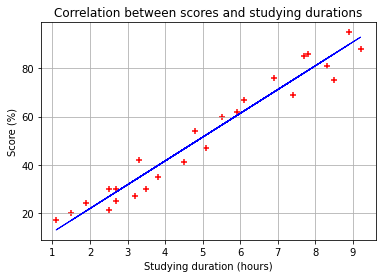

In [10]:
# Display Slope a and Intercept b values and the linear regression formula
# Convert 'a' from numpy.ndarray --> numpy.float64
a = LiReg.coef_[0]
print("Slope a     =", a)
b = LiReg.intercept_
print("Intercept b =", b)
print("f(x) = " + str(a) + " * x + " + str(b))

LiREg_line = a*X + b

#Plot the dataset and the regression line
plt.scatter(X, y, marker='+', color='red')
plt.plot(X, LiREg_line, color='blue', linewidth=1)
plt.title('Correlation between scores and studying durations')
plt.xlabel('Studying duration (hours)')
plt.ylabel('Score (%)')
plt.grid(True)

#### **Actual and Predicted data**

In [11]:
y_pred = LiReg.predict(X_test)

In [12]:
# Compare Actual and Predicted data
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare

,Actual,Predicted
0,85,78.135884
1,24,20.809405
2,54,49.472644
3,21,26.739730
4,75,86.042984


#### **Model evaluation**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [13]:
R_squared = metrics.r2_score(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
MAE = metrics.mean_absolute_error(y_test,y_pred)

print("Coefficient of determination (R\u00b2) =", R_squared)
print("Mean Squared Error (MSE)          =", MSE)
print("Root Mean Squared Error (RMSE)    =", RMSE)
print("Mean Absolute Error (MAE)         =", MAE)

Coefficient of determination (R²) = 0.9308883971384643
Mean Squared Error (MSE)          = 46.5369889028437
Root Mean Squared Error (RMSE)    = 6.821802467298778
Mean Absolute Error (MAE)         = 6.27295634389125


##### All results will be different every time the algorithm re-run due to 'random_state=None'. Overall, R<sup>2</sup> value exceeds 0.8, which rates this algorithm **QUALIFIED**.


#### **An example**
What will be the predicted score if a student studies for 'x' hours per day?

In [14]:
# Suppress warnings whenever the 'input' runs.
# You can replace the whole 'input' with a number to avoid the warning.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# An example:
# I will input 9.25 hours.
x_hour = input("Enter the number of studying hour(s): ")

# [[x_hour]] is to turn a float to a (1,1)-shape list.
y_score = LiReg.predict([[x_hour]])

# Print the final message
print("If a student studies for " + str(x_hour)
      + " hour(s) per day, the student will get the score of " + str(y_score[0]) + ".")

Enter the number of studying hour(s): 9.25
If a student studies for 9.25 hour(s) per day, the student will get the score of 93.45589104469363.


## **The algorithm is complete!**

# Author: Quoàng (Henry Huynh)
Copyright © Quoàng 2021. All right reserved. This is for non-commercial use only.